## Tarea: Ajuste y Comparación de Modelos de la familia SARIMA

¡Bienvenido(a)!
Te invitamos a realizar el segundo trabajo.
- Objetivo: Compar modelos de series de tiempo a través de casos prácticos desarrollados en Python.
- Tipo de actividad: Individual
- Tipo de evaluación: Sumativa 
- Ponderación: 15%
- Puntaje: 60 puntos
- Calificación: Escala de 1 a 7, con una exigencia de 50%. La nota mínima para aprobar es 4.0.

## Enunciado

### Introducción

Esta tarea está pensada en abordar y profundizar los métodos probabilísticos para ajustar series temporales, a través de los modelos de la familia ARIMA. En primer lugar se realizará un análisis descriptivo para proponer los órdenes del modelo SARIMA(p,d,q)x(P,D,Q)[s]. Con el objetivo de comprender las técnicas de selección de modelos se ajustarán diferentes modelos propuestos junto con el modelo propuesto por autoarima con el fin de seleccionar el modelo más apropiado y analizar si es o no adecuado. Además, se determinarán las predicciones para un periodo de interés.

### Descripción del problema

La serie "IPC.xlsx" (disponible en la plataforma) corresponde al índice de precio al consumidor de  Chile desde abril de 1989 hasta junio de 2023 medido de forma mensual. El objetivo del análisis es predecir el IPC para el segundo semestre de 2023, es decir, de julio a diciembre de 2023.

#### Preparación de la data:
Dar el formato adecuado para aplicar los métodos de series de tiempo en Python. Además, de la data completa separar en dos partes (entrenamiento y validación), donde reserve la información de enero a junio de 2023 que actuará como muestra de validación mientras que el resto será la muestra de entrenamiento de los modelos. 

In [16]:
## Librerias
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm

from darts.utils.statistics import plot_acf, plot_pacf
from darts.models import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [17]:
## Importar Datos (La base de datos ya está cargada, no es necesario volver a cargar)
df = pd.read_excel('IPC.xlsx')
df['Fecha'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
print(df.head())

## Datos y Fecha
df.set_index('Fecha', inplace=True)
df.drop(['YEAR', 'MONTH'], axis=1, inplace=True)
df.head()

   YEAR  MONTH        IPC      Fecha
0  1989      4  17.325726 1989-04-01
1  1989      5  17.665933 1989-05-01
2  1989      6  17.977622 1989-06-01
3  1989      7  18.305059 1989-07-01
4  1989      8  18.487909 1989-08-01


,IPC
Fecha,
1989-04-01,17.325726
1989-05-01,17.665933
1989-06-01,17.977622
1989-07-01,18.305059
1989-08-01,18.487909


In [18]:
# Formato de Serie de Tiempo: Guardar la información en
# ipc: serie completa
# ipc_train: serie entrenamiento
# ipc_val: serie validación

# your code here
ipc = TimeSeries.from_series(df)

# Obtener el punto de división basado en los últimos 6 meses
split_date = ipc.end_time() - pd.DateOffset(months=5)

# Separar los datos en entrenamiento y validación
ipc_train, ipc_val = ipc.split_before(pd.Timestamp(split_date))

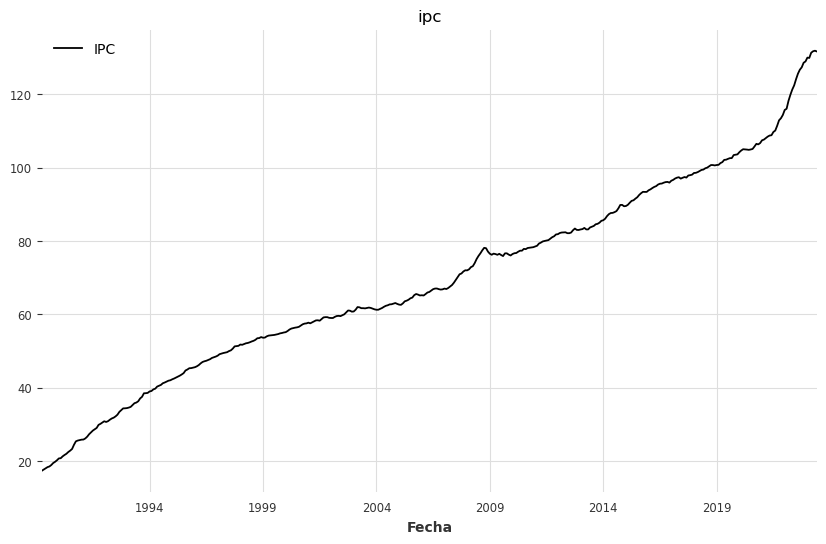

In [19]:
df.plot(figsize=(10, 6))
plt.title('ipc')
plt.show()

In [20]:
# Pruebas para medir si el formato es correcto
assert len(ipc)==411, "fallaste la prueba de len(ipc)==411"
assert len(ipc_train)==405, "fallaste la prueba de len(ipc)==405"
assert len(ipc_val)==6, "fallaste la prueba de len(ipc)==6"

### (Parte 2) Ajuste un Modelo mediante autoarima

- Ajustar un modelo SARIMA a la serie de entrenamiento. Por temas de tiempo de computo asumir que el periodo es 1, y considerar el resto de los parámetros de auto_arima los que vienen por defecto
- Guardar el AIC
- Aplicar el test de Box-Pierce-Ljung para H=18 y guardar p-valor
- Realizar y guardar las predicciones
- Guardar el RMSE de las predicciones

In [21]:
## Guardar la información en:
# mod0: # nombre del modelo 
# aic0: # valor del AIC para el modelo
# p0: valor del p-valor del test de Box-Pierce-Ljung
# Inter_p0: # Debe responder: "El modelo es apropiado" o "El modelo no es apropiado", de acuerdo con la interpretación del p-valor
# pred0: # nombre donde se guardarán las predicciones
# rmse0: # valor del rmse

# your code here
from statsmodels.stats.diagnostic import acorr_ljungbox

# Convierte la serie temporal de Darts a una serie de pandas
ipc_train_pd = ipc_train.pd_series()
ipc_val_pd = ipc_val.pd_series()


# Ajustar el modelo SARIMA utilizando auto_arima
mod0 = pm.auto_arima(ipc_train_pd, 
                    seasonal=True,
                     m = 1,
#                     stepwise=False,
#                     suppress_warnings=True,
#                     error_action="ignore",
#                     #max_order=None,
                     trace=True
                    )


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=121.253, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=245.508, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=199.946, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=138.800, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=120.853, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=118.886, Time=0.29 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=120.882, Time=0.39 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=119.290, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=122.270, Time=0.70 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=120.417, Time=0.41 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 2.996 seconds


In [22]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Guarda el AIC
aic0 = mod0.aic()

result = acorr_ljungbox(mod0.resid() , lags=18, return_df=True)
p0 = result.loc[18, 'lb_pvalue']

# Interpreta el p-valor
if p0 < 0.05:
    Inter_p0 = "El modelo no es apropiado"
else:
    Inter_p0 = "El modelo es apropiado"

# Realiza y guarda las predicciones
pred0 = mod0.predict(n_periods=len(ipc_val))

# Calcula el RMSE de las predicciones
rmse0 = np.sqrt(mean_squared_error(ipc_val_pd, pred0))

# Imprime los resultados
print(f"Model: {mod0}")
print(f"AIC: {aic0}")
print(f"p-value: {p0}")
print(f"Interpretation: {Inter_p0}")
print(f"Predictions: {pred0}")
print(f"RMSE: {rmse0}")


Model:  ARIMA(0,2,2)(0,0,0)[0]          
AIC: 118.88636648936048
p-value: 1.8561925233666172e-05
Interpretation: El modelo no es apropiado
Predictions: 2023-01-01    129.800426
2023-02-01    130.792906
2023-03-01    131.785387
2023-04-01    132.777867
2023-05-01    133.770347
2023-06-01    134.762827
Freq: MS, dtype: float64
RMSE: 1.5498133066800388


In [23]:
pv = sm.stats.acorr_ljungbox(mod0.resid(), lags=[18]).lb_pvalue
pv

18    0.000019
Name: lb_pvalue, dtype: float64

In [24]:
# Prueba oculta: Check del modelo 

In [25]:
# Prueba oculta: Check para el p-valor de la prueba de Box-Pierce-Ljung

In [26]:
# Prueba oculta: Check para las predicciones



### (Parte 3) Ajuste un Modelo SARIMA desde el analisis descriptivo

- Realizar un análisis descriptivo de la serie que incluya grafica, ACF y PACF tanto de la serie original como diferenciada y cualquier estadístico que considere necesario para reconocer el orden del modelo.
- Proponer un modelo desde el análisis descriptivo, es decir, el conjunto de ordenes del modelo SARIMA(p,d,q)x(P,D,Q)[s].
- Ajustar el modelo.
- Guardar el AIC
- En caso que el AIC de este modelo sea mayor al AIC del modelo propuesto por autoarima, proponer otro modelo hasta encontrar uno mejor.
- Aplicar el test de Box-Pierce para H=18 y guardar p-valor
- En caso que el modelo no sea adecuado en términos del test de blancura proponer otro modelo.
- Realizar y guardar las predicciones
- Guardar el RMSE de las predicciones


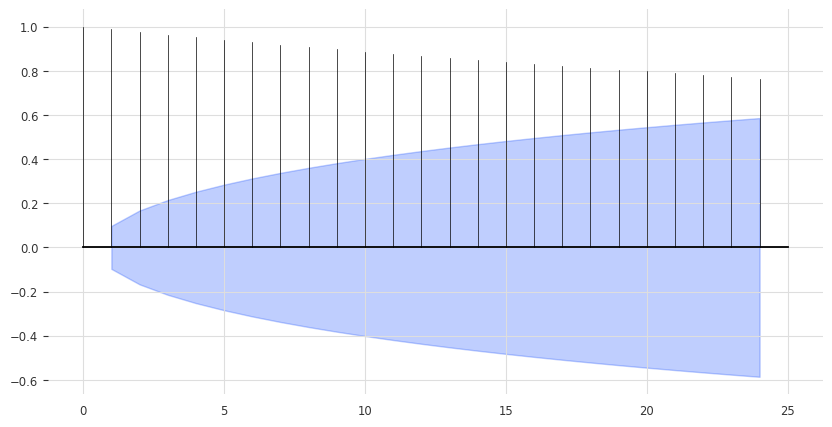

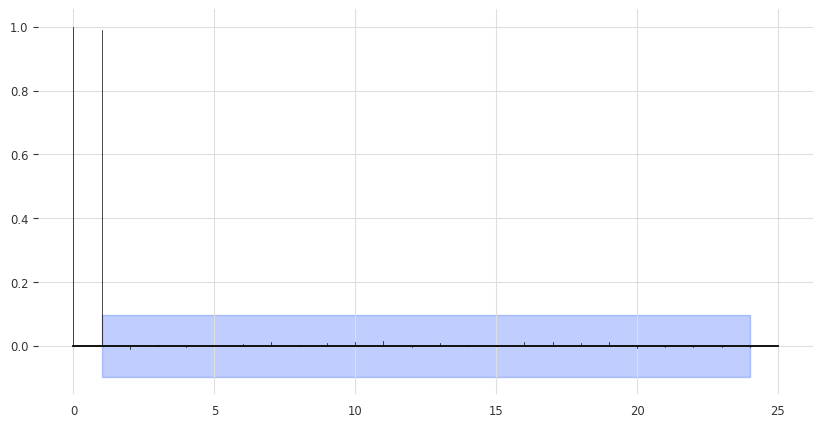

In [27]:
## Guardar la información en:
# mod1: # nombre del modelo, debe ser ajustado con la función SARIMAX
# aic1: # valor del AIC para el modelo
# pred1: # nombre donde se guardarán las predicciones
# rmse1: # valor del rmse
# p1: valor del p-valor del test de Box-Pierce-Ljung
# Inter_p1: # Debe responder: "El modelo es apropiado" o "El modelo no es apropiado", de acuerdo con la interpretación del p-valor


# your code here
# Graficar ACF serie original
plot_acf(ipc_train)

# Graficar PACF serie original
plot_pacf(ipc_train)

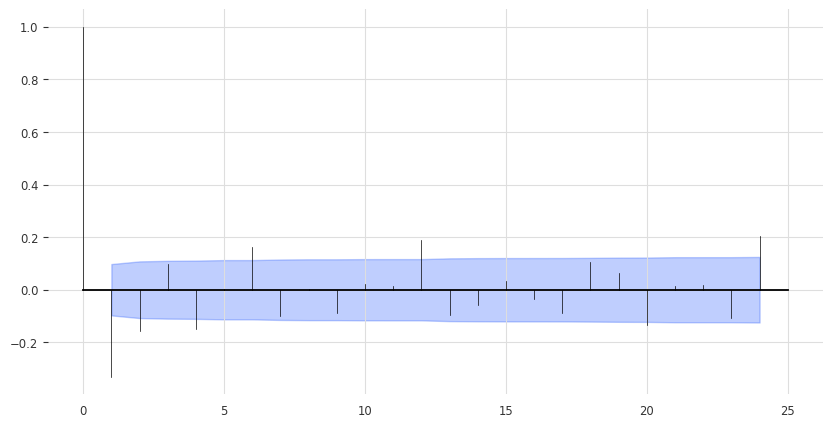

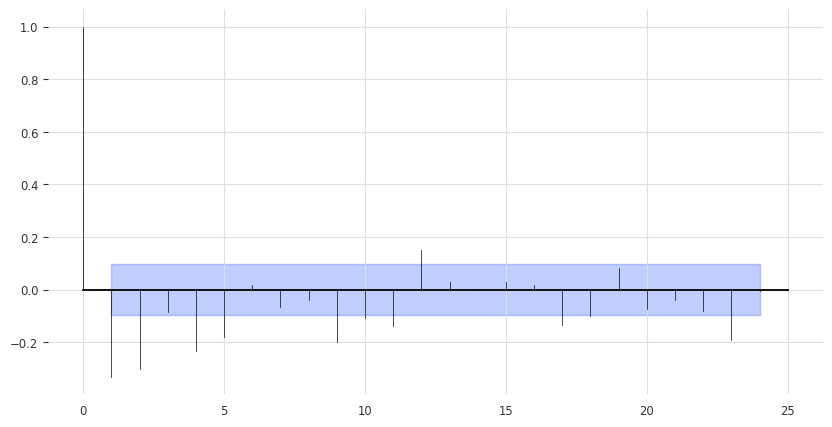

In [28]:
# Diferenciar las series dos veces
ipc_train_diff = ipc_train.diff()
ipc_train_diff = ipc_train_diff.diff()

ipc_val_diff = ipc_val.diff()
ipc_val_diff = ipc_val_diff.diff()

# Graficar ACF serie original
plot_acf(ipc_train_diff)
# Graficar PACF serie original
plot_pacf(ipc_train_diff)

In [29]:
# Convierte la serie temporal de Darts a una serie de pandas
ipc_train_diff_pd = ipc_train_diff.pd_series()
ipc_val_diff_pd = ipc_val_diff.pd_series()

# Realizar el test de Dickey-Fuller
result = adfuller(ipc_train_diff_pd)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.118525127517556
p-value: 1.2865102780099684e-05


In [30]:
# Ajustar el modelo SARIMA utilizando auto_arima
mod1 = pm.auto_arima(ipc_train_pd, start_p=1, start_q=1, start_P=1, start_Q=1,
                      max_p=2, max_q=2, max_P=1, max_Q=2,
                      d=2, D=0, m=6,
                      seasonal=True, stepwise=False,
                      suppress_warnings=True, error_action="ignore", trace=True)



 ARIMA(0,2,0)(0,0,0)[6]             : AIC=245.508, Time=0.03 sec
 ARIMA(0,2,0)(0,0,1)[6]             : AIC=239.433, Time=0.35 sec
 ARIMA(0,2,0)(0,0,2)[6]             : AIC=230.878, Time=2.00 sec
 ARIMA(0,2,0)(0,0,3)[6]             : AIC=231.626, Time=5.89 sec
 ARIMA(0,2,0)(1,0,0)[6]             : AIC=236.556, Time=0.30 sec
 ARIMA(0,2,0)(1,0,1)[6]             : AIC=200.538, Time=1.90 sec
 ARIMA(0,2,0)(1,0,2)[6]             : AIC=202.132, Time=6.61 sec
 ARIMA(0,2,0)(1,0,3)[6]             : AIC=203.840, Time=16.60 sec
 ARIMA(0,2,1)(0,0,0)[6]             : AIC=138.800, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=139.496, Time=0.80 sec
 ARIMA(0,2,1)(0,0,2)[6]             : AIC=124.538, Time=2.91 sec
 ARIMA(0,2,1)(0,0,3)[6]             : AIC=126.281, Time=10.11 sec
 ARIMA(0,2,1)(1,0,0)[6]             : AIC=138.910, Time=0.51 sec
 ARIMA(0,2,1)(1,0,1)[6]             : AIC=inf, Time=3.20 sec
 ARIMA(0,2,1)(1,0,2)[6]             : AIC=89.843, Time=14.61 sec
 ARIMA(0,2,1)(1,0,3)[6]    

In [31]:
# mod1: # nombre del modelo 
# aic1: # valor del AIC para el modelo
# pred1: # nombre donde se guardarán las predicciones
# rmse1: # valor del rmse

# Guarda el AIC
aic1 = mod1.aic()

result2 = sm.stats.acorr_ljungbox(mod1.resid() , lags=[18], return_df=True)
p1 = result2.loc[18, 'lb_pvalue']
# Interpreta el p-valor
if p1 < 0.05:
    Inter_p1 = "El modelo no es apropiado"
else:
    Inter_p1 = "El modelo es apropiado"

# Realiza y guarda las predicciones
pred1 = mod1.predict(n_periods=len(ipc_val_pd))

# Calcula el RMSE de las predicciones
rmse1 = np.sqrt(mean_squared_error(ipc_val_pd, pred1))

# Imprime los resultados
print(f"Model: {mod1}")
print(f"AIC: {aic1}")
print(f"p-value: {p1}")
print(f"Interpretation: {Inter_p1}")
print(f"Predictions: {pred1}")
print(f"RMSE: {rmse1}")

Model:  ARIMA(1,2,2)(1,0,1)[6]          
AIC: 77.52610599213183
p-value: 1.6432451111323905e-05
Interpretation: El modelo no es apropiado
Predictions: 2023-01-01    129.927112
2023-02-01    130.721177
2023-03-01    131.782109
2023-04-01    132.794818
2023-05-01    133.633735
2023-06-01    134.398220
Freq: MS, dtype: float64
RMSE: 1.3978835578963997


A partir del correlograma, es posible evidenciar lo que ya sabíamos, que la serie es no estacionaria y que requiere transformación y diferenciación.

### Serie transformada y diferenciada

De la tarea 1, ya sabemos que la tendencia de la serie original se ajusta muy bien a un polinomio de orden 7. Propongo restar los valores de la serie origina a dicha tendencia de orden 7 para transformar la serie

In [32]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# # Ajustar un modelo polinomial de orden 7
# poly = PolynomialFeatures(degree=7)
# X = np.array(range(len(ipc))).reshape(-1, 1)
# y = df.values
# X_poly = poly.fit_transform(X)
# poly_regressor = LinearRegression().fit(X_poly, y)

# # Restar el modelo ajustado de los datos originales
# y_poly_detrended = y - poly_regressor.predict(X_poly)

# # Crear un gráfico de la serie y_poly_detrended
# plt.figure(figsize=(10, 6))
# plt.plot(df.index, y_poly_detrended, label='y_poly_detrended')
# plt.title('Serie transformada sin tendencia de grado 7')
# plt.xlabel('Fecha')
# plt.ylabel('Valor')
# plt.legend()
# plt.grid(True)
# plt.show()

In [33]:
# # Asegurarse de que el array de numpy sea unidimensional
# y_poly_detrended = y_poly_detrended.flatten()

# # Convertir el array de numpy a una serie de pandas
# y_poly_detrended_pd = pd.Series(y_poly_detrended)
# y_poly_detrended_pd.index = df.index

# # Convertir la serie de pandas a una serie de tiempo de Darts
# y_poly_detrended_ts = TimeSeries.from_series(y_poly_detrended_pd)

# # Diferenciando la serie 
# y_poly_detrended_ts_diff = y_poly_detrended_ts.diff()

# # Obtener el punto de división basado en los últimos 6 meses
# split_date = y_poly_detrended_ts_diff.end_time() - pd.DateOffset(months=5)

# # Separar los datos en entrenamiento y validación
# ipc_train_diff, ipc_val_diff = y_poly_detrended_ts_diff.split_before(split_date)

# # Convierte la serie temporal de Darts a una serie de pandas
# ipc_train_diff_pd = ipc_train_diff.pd_series()
# ipc_val_diff_pd = ipc_val_diff.pd_series()

# ipc_train_diff.plot()
# plt.title('IPC transformada quitando tendencia de grado 7 y diferenciada')
# plt.show()

In [34]:
# from statsmodels.tsa.stattools import adfuller, kpss

# # Realizar el test de Dickey-Fuller
# result = adfuller(ipc_train_diff_pd)
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

# # Realizar el test de KPSS
# result = kpss(ipc_train_diff_pd)
# print(f'KPSS Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

In [35]:
# # Graficar ACF serie diferenciada
# plot_acf(ipc_train_diff)

# # Graficar PACF serie diferenciada
# plot_pacf(ipc_train_diff)

Ahora, vamos a entrenar un modelo SARIMA, con una componente estacional = 6, dado que es posible evidenciar lags significativos en 6, 12 y 24.

In [36]:
# # Ajustar el modelo SARIMA utilizando auto_arima
# mod1 = pm.auto_arima(ipc_train_diff_pd, seasonal=True, stepwise=True,
#                       suppress_warnings=True, error_action="ignore", trace=True,
#                      m=6)

In [37]:
# # mod1: # nombre del modelo 
# # aic1: # valor del AIC para el modelo
# # pred1: # nombre donde se guardarán las predicciones
# # rmse1: # valor del rmse

# # Guarda el AIC
# aic1 = mod1.aic()

# result2 = sm.stats.acorr_ljungbox(mod1.resid() , lags=[18], return_df=True)
# p1 = result2.loc[18, 'lb_pvalue']
# # Interpreta el p-valor
# if p1 < 0.05:
#     Inter_p1 = "El modelo no es apropiado"
# else:
#     Inter_p1 = "El modelo es apropiado"

# # Realiza y guarda las predicciones
# pred1 = mod1.predict(n_periods=len(ipc_val_diff))

# # Calcula el RMSE de las predicciones
# rmse1 = np.sqrt(mean_squared_error(ipc_val_diff_pd, pred1))

# # Imprime los resultados
# print(f"Model: {mod1}")
# print(f"AIC: {aic1}")
# print(f"p-value: {p1}")
# print(f"Interpretation: {Inter_p1}")
# print(f"Predictions: {pred1}")
# print(f"RMSE: {rmse1}")

Es posible identificar que el modelo propuesto es un SARIMA(3,0,3)(2,0,2)[6]. El AIC es menor que el obtenido en el punto 1. Así mismo, el p-value indica que el modelo es apropiado. El RMSE= 0.87 también nos brinda mucha confianza y nos muestra que es un excelente modelo.

In [48]:
# Parámetros no estacionales (p, d, q)
p, d, q = 1, 2, 2 # Reemplaza con tus valores

# Parámetros estacionales (P, D, Q, m)
P, D, Q, m = 1, 0, 1, 6  # Reemplaza con tus valores (m es la periodicidad estacional)

# Ajuste del modelo SARIMA
modfinal = sm.tsa.SARIMAX(df,
                            order=(p, d, q),
                              seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                                trend='n')

# Ajuste del modelo
resultado_sarima = modfinal.fit(disp=0)

# # Mostrar el resumen del modelo
# print(resultado_sarima.summary())

print("AIC:", resultado_sarima.aic)

# Realizar predicciones
prediccion = resultado_sarima.get_forecast(steps=6)

# Obtener valores predichos y sus intervalos de confianza
predicciones_mean = prediccion.predicted_mean

r_pvalue = acorr_ljungbox(resultado_sarima.resid , lags=18, return_df=True)
p1 = r_pvalue.loc[18, 'lb_pvalue']

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(ipc_val_pd, predicciones_mean))
print("RMSE:", rmse)
print("P-VALUE:", p1)

AIC: 112.96982361660804
RMSE: 2.3771046775955385
P-VALUE: 2.017715473990375e-26


In [49]:
print("AIC:", resultado_sarima.aic)

# Realizar predicciones
prediccion = resultado_sarima.get_forecast(6)

# Obtener valores predichos y sus intervalos de confianza
predicciones_mean = prediccion.predicted_mean

p_values = resultado_sarima.pvalues

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(ipc_val_pd, predicciones_mean))
print("RMSE:", rmse)

AIC: 112.96982361660804
RMSE: 2.3771046775955385


In [50]:
prediccion.predicted_mean

2023-07-01    132.242362
2023-08-01    132.517415
2023-09-01    133.266123
2023-10-01    133.898630
2023-11-01    134.354486
2023-12-01    134.698226
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
# Prueba oculta: Check del modelo mejor que autoarima según AIC

In [52]:
# Prueba oculta: Check para el p-valor de la prueba de Box-Pierce-Ljung

In [53]:
# Prueba oculta: Check del RMSE del modelo propuesto

### (Parte 4) Predecir de julio a diciembre de 2023

- Utilizar los órdenes del mejor modelo ajustado con la muestra de entrenamiento y ajustar con toda la muestra.
- Realizar las predicciones para los meses de julio a diciembre de 2023.

In [54]:
# Hacer predicciones para los próximos 6 pasos de tiempo
prediccion = resultado_sarima.get_forecast(steps=6)
prediccion_confianza = prediccion.summary_frame()

# Imprimir las predicciones
print("Predicciones:")
print(prediccion_confianza['mean'])

# Imprimir los intervalos de confianza
print("\nIntervalos de Confianza:")
print(prediccion_confianza[['mean_ci_lower', 'mean_ci_upper']])

Predicciones:
2023-07-01    132.242362
2023-08-01    132.517415
2023-09-01    133.266123
2023-10-01    133.898630
2023-11-01    134.354486
2023-12-01    134.698226
Freq: MS, Name: mean, dtype: float64

Intervalos de Confianza:
IPC         mean_ci_lower  mean_ci_upper
2023-07-01     131.713917     132.770807
2023-08-01     131.619103     133.415728
2023-09-01     132.005911     134.526335
2023-10-01     132.283450     135.513811
2023-11-01     132.392892     136.316081
2023-12-01     132.399754     136.996698


In [55]:
# ## Guardar la información en:
# # modfinal: # nombre del modelo 
# # predicciones: # nombre donde se guardarán las predicciones

# # your code here

# Ajuste del modelo SARIMA
modfinal = sm.tsa.SARIMAX(df,
                            order=(p, d, q),
                              seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                                trend='n').fit(disp=0)

pred = modfinal.get_forecast(steps=6)

predicciones = pred.predicted_mean
predicciones

2023-07-01    132.242362
2023-08-01    132.517415
2023-09-01    133.266123
2023-10-01    133.898630
2023-11-01    134.354486
2023-12-01    134.698226
Freq: MS, Name: predicted_mean, dtype: float64

In [56]:
mod1 = sm.tsa.SARIMAX(ipc_train_pd,
                            order=(p, d, q),
                              seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                                trend='n').fit(disp=0)

In [57]:
# Prueba oculta: Check para las predicciones del modelo propuesto